In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense, Dropout
from keras.models import Model,Sequential

Using TensorFlow backend.


https://arxiv.org/pdf/1809.10717.pdf

In [6]:
DATA_DIR = '/Users/PeterC/Documents/gt/practicum/autoencoders/data/'

DATA_DIR = '/Users/chenpete/Documents/ESP/practicum/autoencoders/data/'


In [7]:
df = pd.read_csv(DATA_DIR + 'paper_mill_rare_events.csv')
df['time'] = pd.to_datetime(df['time'])

In [8]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


## Lots of class imbalance (rare events)

In [13]:
df['y'].value_counts()

0    18274
1      124
Name: y, dtype: int64

### Label previous 20 as failed when failure occurs

In [27]:
failure_length= 20

for i in range(df.shape[0]):
    if df.iloc[i]['y'] == 1:
        df.iloc[i-failure_length:i] = 1

In [28]:
df['y'].value_counts()

0    16121
1     2277
Name: y, dtype: int64

## Scale datasets with both standard and minmax scaler

In [29]:
non_scale_cols = ['time','y']
param_cols = [
        'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60'
]
sc_std = StandardScaler()
df_scaled_std = pd.DataFrame(data = sc_std.fit_transform(df[param_cols]),columns=param_cols)
df_scaled_std = pd.concat([df[non_scale_cols],df_scaled_std],axis=1)

sc_minmax = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(data = sc_minmax.fit_transform(df[param_cols]),columns=param_cols)
df_scaled_minmax = pd.concat([df[non_scale_cols],df_scaled_minmax],axis=1)

In [30]:
df_scaled_std.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,1999-05-01 00:00:00,0,0.338231,-1.030545,-0.861630,0.207402,-0.363913,-0.706156,-0.345984,-0.53014,...,0.105147,1.626053,-0.108173,-1.945203,-0.450722,0.105178,1.411958,-0.254451,0.096427,-0.351470
1,1999-05-01 00:02:00,0,0.467800,-1.019207,-0.847905,0.229712,-0.378401,-0.649606,-0.345984,-0.53014,...,0.105147,1.626764,-0.105990,-1.945473,-0.573951,0.160405,1.053995,-0.254169,0.109779,-0.351448
2,1999-05-01 00:04:00,0,0.321465,-1.048404,-0.907273,0.212547,-0.392889,-0.622350,-0.316292,-0.53014,...,0.105147,1.627518,-0.103807,-1.945744,-0.601840,0.215632,1.440980,-0.253885,0.182729,-0.351426
3,1999-05-01 00:06:00,0,0.240029,-1.064704,-0.848837,0.204658,-0.406795,-0.642493,-0.342024,-0.53014,...,0.105147,1.628272,-0.101679,-1.946014,-0.629729,0.146254,1.644132,-0.253604,0.252206,-0.351405
4,1999-05-01 00:08:00,0,0.192923,-1.062811,-0.903727,0.221848,-0.417288,-0.612568,-0.345984,-0.53014,...,0.105147,1.629025,-0.099496,-1.946285,-0.657617,0.149309,1.470001,-0.253433,0.140902,-0.351380


In [31]:
df_scaled_std['y'].value_counts()

0    16121
1     2277
Name: y, dtype: int64

### Plot standard scaled

In [17]:
%%capture
for col in param_cols:
    plt.figure(figsize=(15,5))
    plt.plot(df_scaled_std[col])
    for val in list(df_scaled_std[df_scaled_std['y']==1].index):
        plt.axvline(val,color='red',linewidth=.2)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.savefig(DATA_DIR +'plots/std_scaled_{}.png'.format(col))

## Plot Min Max

In [22]:
%%capture
for col in param_cols:
    plt.figure(figsize=(15,5))
    plt.plot(df_scaled_minmax[col])
    for val in list(df_scaled_minmax[df_scaled_minmax['y']==1].index):
        plt.axvline(val,color='red',linewidth=.2)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.savefig(DATA_DIR +'plots/minmax_scaled_{}.png'.format(col))

In [32]:
X_nominal_std = df_scaled_std[df_scaled_std['y'] == 0][param_cols]
X_event_std = df_scaled_std[df_scaled_std['y'] == 1][param_cols]

X_nominal_minmax = df_scaled_minmax[df_scaled_minmax['y'] == 0][param_cols]
X_event_minmax = df_scaled_minmax[df_scaled_minmax['y'] == 1][param_cols]

y_nominal = df_scaled_std[df_scaled_std['y'] == 0]['y']
y_event = df_scaled_std[df_scaled_std['y'] == 1]['y']

In [33]:
X_nominal_std.shape

(16121, 59)

In [34]:
X_event_std.shape

(2277, 59)

In [35]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_nominal_std, y_nominal, test_size=0.1, random_state=0)

In [36]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_nominal_minmax, y_nominal, test_size=0.2, random_state=0)

In [37]:
X_test_std = X_test_std.append(X_event_std)
y_test_std =y_test_std.append(y_event)

X_test_minmax = X_test_std.append(X_event_minmax)
y_test_minmax =y_test_std.append(y_event)

In [38]:
X_test_std.shape

(3890, 59)

In [39]:
X_train_std.shape

(14508, 59)

In [40]:
def simple_ann_autoencoder_regression():
    model = Sequential()
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = 16,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = len(param_cols),activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def simple_ann_autoencoder_classification():
    model = Sequential()
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = 16,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = len(param_cols),activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy',)
    return model

In [52]:
def results_df(X_true,X_pred,y_test):
    residual = X_pred - X_true
    residual_avg = np.abs(np.mean(residual,axis=1))
    df = pd.DataFrame(data = {'residual_avg':residual_avg,'y':y_test})
    return df

def plot_results_hist(df_results):
    plt.figure()
    sns.distplot(df_results[df_results['y']==1]['residual_avg'],norm_hist=True)
    sns.distplot(df_results[df_results['y']==0]['residual_avg'],norm_hist=True)
    plt.legend(['event_residuals_avg','nominal_residuals_avg'])
    plt.title('distribution of average residuals')
    
def plot_results_boxplot(df_results):
    plt.figure()
    sns.boxplot(x='y',y='residual_avg',data=df_results)

# Model 1: Layer autoencoder - standard scaler (regression

In [43]:
model1 = simple_ann_autoencoder_regression()
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1920      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 59)                1947      
Total params: 4,939
Trainable params: 4,939
Non-trainable params: 0
_________________________________________________________________


In [44]:
history_callback1 = model1.fit(X_train_std,X_train_std,epochs=150,batch_size = 12)
loss_history1 = history_callback1.history['loss']

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
14508/14508 [==============================] - 1s 87us/step - loss: 0.2758
Epoch 2/150
14508/14508 [==============================] - 1s 65us/step - loss: 0.1275
Epoch 3/150
14508/14508 [==============================] - 1s 64us/step - loss: 0.0966
Epoch 4/150
14508/14508 [==============================] - 1s 65us/step - loss: 0.0833
Epoch 5/150
14508/14508 [==============================] - 1s 65us/step - loss: 0.0761
Epoch 6/150
14508/14508 [==============================] - 1s 65us/step - loss: 0.0712
Epoch 7/150
14508/14508 [==============================] - 1s 69us/step - loss: 0.0677
Epoch 8/150
14508/14508 [==============================] - 1s 70us/step - loss: 0.0652
Epoch 9/150
14508/14508 [==============================] - 1s 67us/step - loss: 0.0624
Epoch 10/150
14508/14508 [==============================] - 1s 69us/step - loss: 0.0603
Epoch 11/150
14508/14508 [==============================] - 1s 68us/step - loss: 

Text(0.5, 1.0, 'loss history')

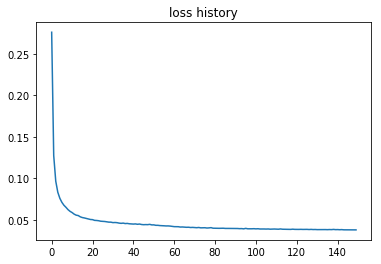

In [46]:
plt.plot(loss_history1)
plt.title('loss history')

In [47]:
X_pred1 = model1.predict(X_test_std)

In [53]:
df_results1 = results_df(X_test_std,X_pred1,y_test_std)

Text(0.5, 1.0, 'distribution of average residuals')

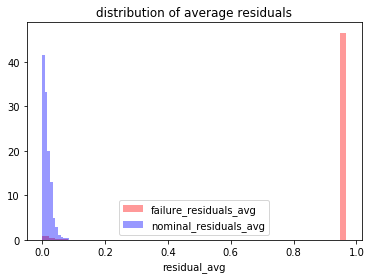

In [77]:
plt.figure()
sns.distplot(df_results1[df_results1['y']==1]['residual_avg'],norm_hist=True,kde=False,color='red')
sns.distplot(df_results1[df_results1['y']==0]['residual_avg'],norm_hist=True,kde=False,color='blue')
plt.legend(['failure_residuals_avg','nominal_residuals_avg'])
plt.title('distribution of average residuals')

In [58]:
df_results1.head()

,residual_avg,y
11099,0.019745,0
10481,0.000795,0
6138,0.010569,0
1172,0.019587,0
6194,0.026945,0


In [66]:
average_res_nominal = np.mean(df_results1[df_results1['y'] == 0]['residual_avg'])

std_res_nominal = np.std(df_results1[df_results1['y'] == 0]['residual_avg'])

threshold = average_res_nominal + 3*std_res_nominal

In [78]:
average_res_nominal

0.01642070781631027

In [65]:
threshold

0.07119573884838884

In [71]:
res_nominal = df_results1[df_results1['y'] == 0]['residual_avg']
res_event = df_results1[df_results1['y'] == 1]['residual_avg']

In [75]:
res_event.shape

(2277,)

In [74]:
res_event[res_event>threshold].shape

(2197,)

In [82]:
2197-2277

-80

In [83]:
100*16/1613

0.9919404835709857

In [84]:
1613-16

1597

In [80]:
res_nominal.shape[0]

1613

In [79]:
res_nominal[res_nominal>threshold].shape

(16,)

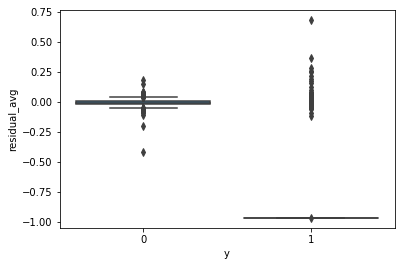

In [51]:
plot_results_boxplot(df_results1)

# Model 2: Layer autoencoder - minmax scaler (classification - sigmoid)

In [99]:
model2 = simple_ann_autoencoder_classification()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1920      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 59)                1947      
Total params: 4,939
Trainable params: 4,939
Non-trainable params: 0
_________________________________________________________________


In [100]:
history_callback2 = model2.fit(X_train_minmax,X_train_minmax,epochs=100,batch_size = 12)
loss_history2 = history_callback2.history['loss']

Epoch 1/100
12896/12896 [==============================] - 1s 50us/step - loss: 0.4897
Epoch 2/100
12896/12896 [==============================] - 1s 56us/step - loss: 0.4667
Epoch 3/100
12896/12896 [==============================] - 1s 53us/step - loss: 0.4635
Epoch 4/100
12896/12896 [==============================] - 1s 53us/step - loss: 0.4620
Epoch 5/100
12896/12896 [==============================] - 1s 54us/step - loss: 0.4611
Epoch 6/100
12896/12896 [==============================] - 1s 51us/step - loss: 0.4603
Epoch 7/100
12896/12896 [==============================] - 1s 53us/step - loss: 0.4597
Epoch 8/100
12896/12896 [==============================] - 1s 53us/step - loss: 0.4593
Epoch 9/100
12896/12896 [==============================] - 1s 56us/step - loss: 0.4590
Epoch 10/100
12896/12896 [==============================] - 1s 53us/step - loss: 0.4588
Epoch 11/100
12896/12896 [==============================] - 1s 54us/step - loss: 0.4587
Epoch 12/100
12896/12896 [===============

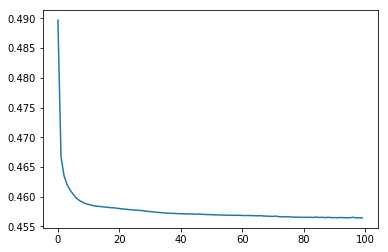

In [101]:
plt.plot(loss_history2)

In [102]:
X_pred2 = model2.predict(X_test_minmax)

In [103]:
df_results2 = results_df(X_test_minmax,X_pred2,y_test_minmax)

/Users/PeterC/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


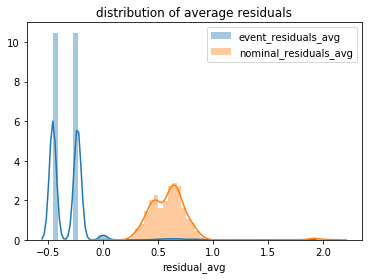

In [104]:
plot_results_hist(df_results2)